In [44]:
import cmath
import networkx as nx
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import random

# Opgave 1 *

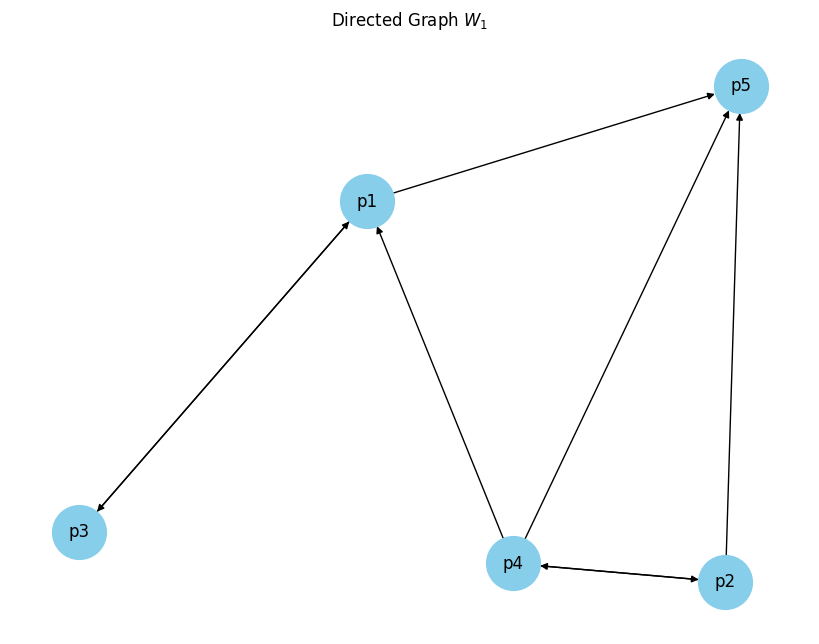

In [45]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5']
G.add_nodes_from(nodes)

edges = [('p1', 'p3'), ('p1', 'p5'),
         ('p2', 'p4'), ('p2', 'p5'),
         ('p3', 'p1'),
         ('p4', 'p1'), ('p4', 'p2'), ('p4', 'p5')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 2 *

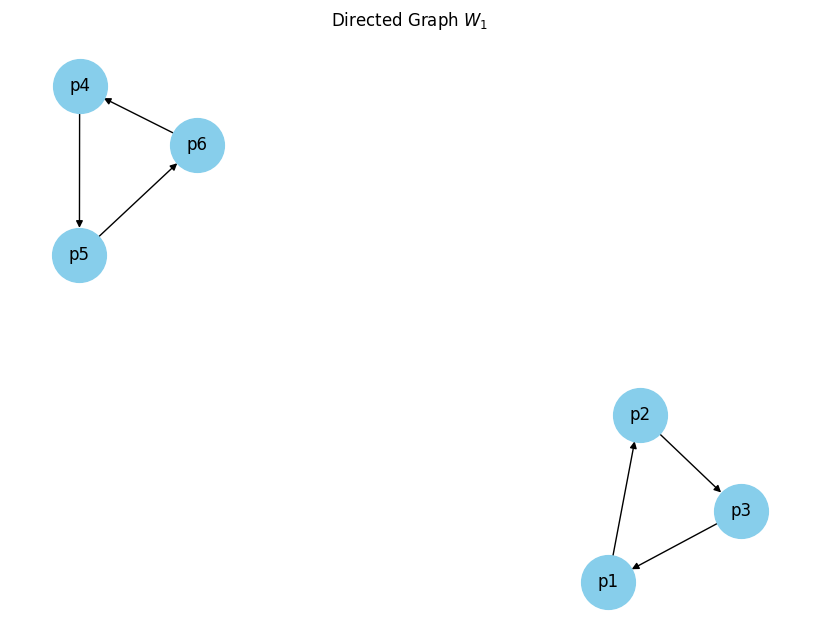

In [46]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
G.add_nodes_from(nodes)

edges = [('p1', 'p2'),
         ('p2', 'p3'),
         ('p3', 'p1'),
         ('p4', 'p5'),
         ('p5', 'p6'),
         ('p6', 'p4')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 3 & 4 *

In [47]:


# Definition af netværket
W1 = {
    'P1': {'P2', 'P3'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {}
}

W2 = {
    'P1': {'P2'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {'P6'},
    'P6': {'P4'}
}

def makeAdjacencyMatrix(W):
    nodes = list(W.keys())
    length = len(nodes)  
    
    output = np.zeros((length, length), dtype=int)
    
    node_index = {node: idx for idx, node in enumerate(nodes)}
    
    for i, node in enumerate(nodes):
        for neighbor in W[node]:
            j = node_index[neighbor]  
            output[i][j] = 1  
    
    return output

# Test function
print("W1")
print(makeAdjacencyMatrix(W1))
print("\nW2")
print(makeAdjacencyMatrix(W2))

W1
[[0 1 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]

W2
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]


# Opgave 5

In [1]:
import numpy as np

def checkArrayValue(array,value):
    for i in range(0,len(array)):
        if array[i] == value:
            return True
        
    return False

def make_web(n,k,kmin=0):

    # Input: n og k er ikke-negative heltal
    # Output: web er en dictionary med n nøgler.
    # Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
    
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(range(n)) # definerer n nøgler fra 0 til n-1 
    web = dict()
    
    for j in keys:
        numlinks = np.random.randint(kmin, k + 1) 
        links = list(np.random.choice([x for x in keys if x != j], size=numlinks, replace=False))
        web[j] = links 

    return web

print(make_web(100,99,50))

{0: [25, 57, 33, 46, 17, 30, 27, 54, 53, 76, 11, 65, 49, 98, 32, 92, 1, 6, 91, 7, 82, 3, 94, 15, 8, 38, 31, 52, 42, 51, 34, 63, 67, 86, 9, 64, 14, 21, 79, 99, 41, 28, 44, 48, 29, 2, 62, 60, 71, 77, 55, 10, 68, 58, 43, 93, 4, 13, 83, 95, 80, 74, 40, 66, 75, 69, 97, 50, 16, 19, 36, 20, 24, 5, 35, 37, 73, 26, 70, 18, 85, 90, 61, 23], 1: [77, 98, 57, 36, 50, 44, 29, 61, 10, 39, 14, 35, 74, 80, 97, 46, 67, 22, 30, 5, 94, 18, 41, 60, 7, 34, 58, 87, 9, 52, 62, 12, 56, 84, 95, 53, 64, 99, 21, 43, 76, 85, 86, 69, 15, 71, 73, 48, 68, 59, 19, 23, 92, 6, 3, 47, 90], 2: [7, 79, 87, 17, 32, 43, 38, 42, 52, 20, 77, 66, 23, 56, 5, 15, 61, 45, 94, 62, 1, 97, 78, 50, 25, 88, 28, 75, 21, 35, 51, 76, 71, 90, 39, 19, 99, 89, 4, 74, 36, 24, 55, 16, 9, 0, 72, 67, 8, 81, 18, 53, 40, 85, 54, 29, 10, 30, 49, 27, 26, 44, 41, 37, 47, 46, 82, 31, 69, 86, 64, 84, 93, 57, 91, 11, 22, 6, 65, 68, 95, 14, 70, 98, 80, 73, 63, 13, 48, 34, 96, 92, 58, 33, 60, 83], 3: [13, 6, 54, 72, 56, 39, 75, 46, 67, 65, 21, 2, 16, 69, 

# Opgave 6 *

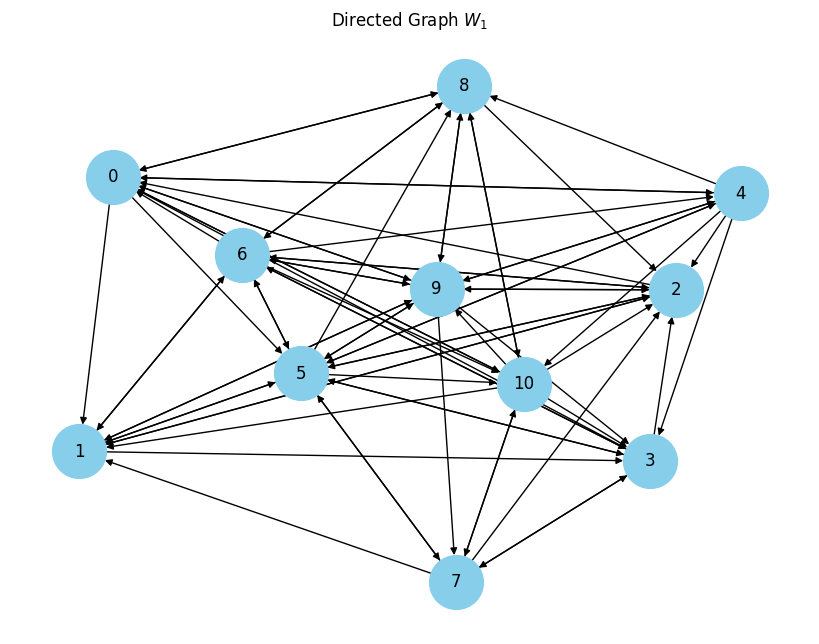

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(web):
    # Input: netværk som dictionary
    # Output: Netværk visualiseret som graf

    G = nx.DiGraph()

    for node, neighbors in web.items():
        for target in neighbors:
            G.add_edge(node, target)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
    plt.title("Directed Graph $W_1$")
    plt.show()

visualize_graph(make_web(11,10,5))